In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv('data/auckland_rain_temp_statsNZ.csv')
weather.head()

,date,rainfall(mm),tavg,tmax,tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [151]:
weather['israin'] = weather['rainfall(mm)'] != 0
weather

,date,rainfall(mm),tavg,tmax,tmin,israin
0,1966-01-01,0.0,18.0,22.2,13.9,False
1,1966-01-02,26.2,20.5,23.9,17.1,True
2,1966-01-03,0.0,20.3,23.5,17.1,False
3,1966-01-04,0.0,20.3,24.4,16.2,False
4,1966-01-05,1.3,20.6,23.4,17.8,True
...,...,...,...,...,...,...
20814,2022-12-27,0.0,21.0,25.1,17.0,False
20815,2022-12-28,0.0,22.4,26.7,18.1,False
20816,2022-12-29,0.0,21.8,25.1,18.6,False
20817,2022-12-30,0.0,21.6,24.0,19.1,False


In [152]:
# Define the soil moisture capacity threshold
soil_moisture_capacity = 150  # Change this value as needed

# Create a 'Status' column based on rainfall and soil moisture capacity
def categorize_status(row):
    if row['rainfall(mm)'] > 25:
        return 'Heavy Rainfall'
    elif row['rainfall(mm)'] > 10:
        return 'Moderate Rainfall'
    elif row['rainfall(mm)'] > 0:
        return 'Light Rainfall'
    elif row['rainfall(mm)'] == 0 and row['tmin'] > 0:
        return 'No Rain'
    elif row['rainfall(mm)'] == 0 and row['tmin'] <= 0 and row['tavg'] > soil_moisture_capacity:
        return 'Drought'
    elif row['rainfall(mm)'] == 0 and row['tmin'] <= 0 and row['tavg'] <= soil_moisture_capacity:
        return 'Severe Drought'
    else:
        return 'Unknown'
    
weather['status'] = weather.apply(categorize_status, axis=1)
# Display the first few rows with the 'Status' column
print(weather.head())

         date  rainfall(mm)  tavg  tmax  tmin  israin          status
0  1966-01-01           0.0  18.0  22.2  13.9   False         No Rain
1  1966-01-02          26.2  20.5  23.9  17.1    True  Heavy Rainfall
2  1966-01-03           0.0  20.3  23.5  17.1   False         No Rain
3  1966-01-04           0.0  20.3  24.4  16.2   False         No Rain
4  1966-01-05           1.3  20.6  23.4  17.8    True  Light Rainfall


In [153]:
weather.shape

(20819, 7)

In [154]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          20819 non-null  object 
 1   rainfall(mm)  20819 non-null  float64
 2   tavg          20819 non-null  float64
 3   tmax          20819 non-null  float64
 4   tmin          20819 non-null  float64
 5   israin        20819 non-null  bool   
 6   status        20819 non-null  object 
dtypes: bool(1), float64(4), object(2)
memory usage: 996.3+ KB


In [155]:
#Unique values in predictor column
weather['israin'].unique()

array([False,  True])

In [156]:
weather[weather['israin'].isnull()]

,date,rainfall(mm),tavg,tmax,tmin,israin,status


In [157]:
weather['israin'].value_counts()

israin
False    10419
True     10400
Name: count, dtype: int64

In [158]:
weather['date'] = pd.to_datetime('2022-12-27')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20819 non-null  datetime64[ns]
 1   rainfall(mm)  20819 non-null  float64       
 2   tavg          20819 non-null  float64       
 3   tmax          20819 non-null  float64       
 4   tmin          20819 non-null  float64       
 5   israin        20819 non-null  bool          
 6   status        20819 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(4), object(1)
memory usage: 996.3+ KB


#TMIN and TMAX are highly positively correlated to each other as observed from above correlation matrix.

In [159]:
weather.columns

Index(['date', 'rainfall(mm)', 'tavg', 'tmax', 'tmin', 'israin', 'status'], dtype='object')

In [160]:
#Splitting dependent and independent variables
y=weather.pop('status')
X=weather

In [161]:
#Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [162]:
#Default Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [163]:
#Fitting train data into model
clf.fit(X_train,y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>)

In [ ]:
#Prediction on test data
pred=clf.predict(X_test)

In [ ]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[3108    0]
 [   0 3138]]


In [ ]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3108
        True       1.00      1.00      1.00      3138

    accuracy                           1.00      6246
   macro avg       1.00      1.00      1.00      6246
weighted avg       1.00      1.00      1.00      6246



In [ ]:
#Feature Importance
clf.feature_importances_

array([0.9697126 , 0.00845654, 0.01544097, 0.00638989])

In [ ]:
weather=weather.drop(['date', 'israin', 'status'],axis=1)

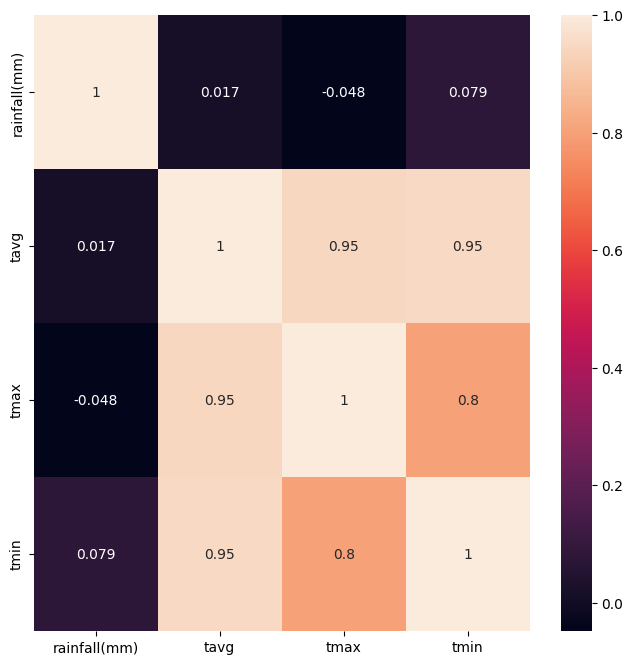

In [ ]:
# Heatmap for correlation between variables
import seaborn as sns

# Select only the numeric columns from the 'weather' DataFrame
numeric_columns = weather.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 8))
sns.heatmap(weather.corr(), annot=True)
plt.show()